In [2]:
import torch
import numpy as np
from torch import nn
import random
import torch.nn.functional as F
import collections
from torch.optim.lr_scheduler import StepLR
from CommunicationP3DX import CommunicationP3DX
from Agent import AgentClass
from std_srvs.srv import Empty
import rospy
import time
import shelve
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

path ='/media/xnd/7A309A87309A49D1/sia_23/10k/sim_data/'

workspace = shelve.open(path+'wsh_mean4_20231001_183307/wsh_20231003_042932.out')
# true if the key exists
vars = list(workspace.keys())
print(workspace)
print(vars)
hist_dict = workspace['hist_dict']

# '/media/xnd/7A309A87309A49D1/sia_23/10k/sia_data'

['Agent', 'AgentClass', 'CommunicationP3DX', 'Empty', 'Memory', 'QNetwork', 'QNetworkCNN', 'Q_1', 'StepLR', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'actions_angular', 'actions_linear', 'checkpoint_inter', 'datetime', 'device', 'evaluate', 'filename', 'goal_zones_x', 'goal_zones_y', 'hist_dict', 'key', 'laser_scan_state_type_atual', 'main', 'max_episodes', 'max_iterations', 'my_shelf', 'n_sectors', 'path', 'pause_physics_client', 'performance', 'reset_simulation', 'select_action', 'str_hora_agr', 'str_hora_inicio_treino', 'theta_atual', 'train', 'unpause_physics_client', 'update_parameters']


In [3]:
for key in hist_dict.keys(): print(key,end=' - ')

pos - scan - rewards - rewards_eval - rates - state - epresult - 

In [4]:
len(hist_dict['pos'].keys())

10000

In [5]:
hist_dict['pos'][9500][0][0:2]

[-3.6806070606373864, 1.9100548284999779]

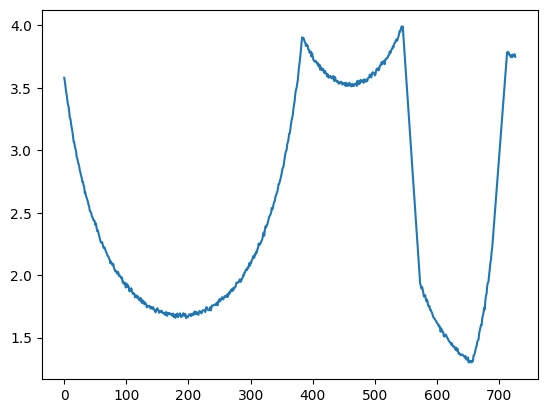

In [6]:
sns.lineplot(hist_dict['scan'][9500][0]);

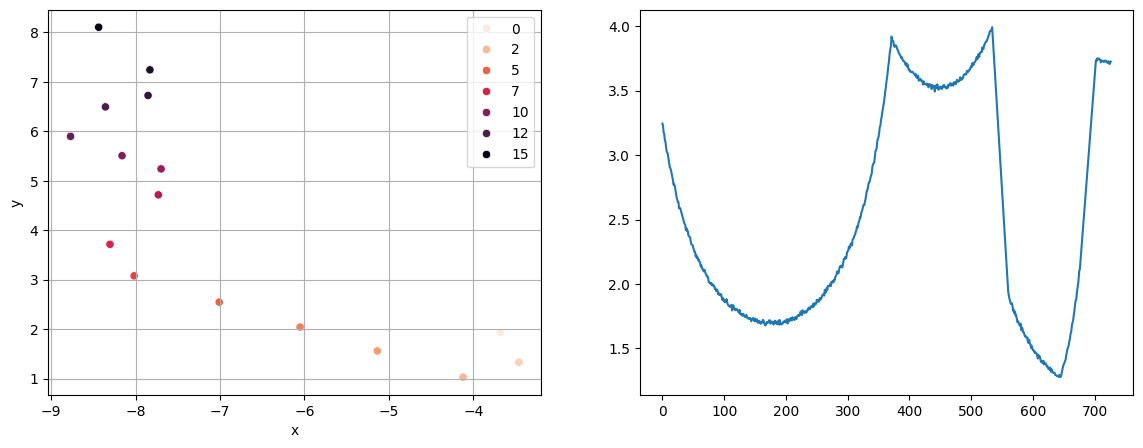

In [7]:
episode = 9900

df_episode_positions = pd.DataFrame({'i':range(len(hist_dict['pos'][episode])),
                                      'x':[pos[0] for pos in hist_dict['pos'][episode]], 
                                      'y':[pos[1] for pos in hist_dict['pos'][episode]]})

plt.figure(figsize=(14,5))
plt.subplot(121)
sns.scatterplot(df_episode_positions, x= 'x', y='y', hue='i', palette=sns.color_palette("rocket_r",as_cmap=True))
plt.legend(bbox_to_anchor = (1,1)) #loc = 'upper right', 
plt.grid(True)

plt.subplot(122)

sns.lineplot(hist_dict['scan'][episode][0]);